In [ ]:
import torch

In [ ]:
sentence = 'Life is short, eat dessert first'

word = (sentence.replace(',','').split())
qk = {k:v for v,k in enumerate(sorted(word))}
qk

{'Life': 0, 'dessert': 1, 'eat': 2, 'first': 3, 'is': 4, 'short': 5}

In [ ]:
iword = torch.tensor([qk[k] for k in word])
iword

tensor([0, 4, 5, 2, 1, 3])

In [ ]:
sentence = 'Life is short, eat dessert first'
ab = sentence.replace(',','').split()
ab

['Life', 'is', 'short', 'eat', 'dessert', 'first']

In [ ]:
torch.manual_seed(123)
embed = torch.nn.Embedding(len(iword),16)
embed_sentence = embed(iword).detach()
embed_sentence

tensor([[ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196, -0.3792,
          0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,  0.2692],
        [ 0.5146,  0.9938, -0.2587, -1.0826, -0.0444,  1.6236, -2.3229,  1.0878,
          0.6716,  0.6933, -0.9487, -0.0765, -0.1526,  0.1167,  0.4403, -1.4465],
        [ 0.2553, -0.5496,  1.0042,  0.8272, -0.3948,  0.4892, -0.2168, -1.7472,
         -1.6025, -1.0764,  0.9031, -0.7218, -0.5951, -0.7112,  0.6230, -1.3729],
        [-1.3250,  0.1784, -2.1338,  1.0524, -0.3885, -0.9343, -0.4991, -1.0867,
          0.8805,  1.5542,  0.6266, -0.1755,  0.0983, -0.0935,  0.2662, -0.5850],
        [-0.0770, -1.0205, -0.1690,  0.9178,  1.5810,  1.3010,  1.2753, -0.2010,
          0.4965, -1.5723,  0.9666, -1.1481, -1.1589,  0.3255, -0.6315, -2.8400],
        [ 0.8768,  1.6221, -1.4779,  1.1331, -1.2203,  1.3139,  1.0533,  0.1388,
          2.2473, -0.8036, -0.2808,  0.7697, -0.6596, -0.7979,  0.1838,  0.2293]])

In [ ]:
# creating manual embedding.
torch.manual_seed(123)
emb = torch.randn(6,16)
emb_i = emb[iword]
emb_i.allclose(embed_sentence)
print(emb)
print(iword)

tensor([[ 0.3374, -0.1778, -0.3035, -0.5880,  0.3486,  0.6603, -0.2196, -0.3792,
          0.7671, -1.1925,  0.6984, -1.4097,  0.1794,  1.8951,  0.4954,  0.2692],
        [-0.0770, -1.0205, -0.1690,  0.9178,  1.5810,  1.3010,  1.2753, -0.2010,
          0.4965, -1.5723,  0.9666, -1.1481, -1.1589,  0.3255, -0.6315, -2.8400],
        [-1.3250,  0.1784, -2.1338,  1.0524, -0.3885, -0.9343, -0.4991, -1.0867,
          0.8805,  1.5542,  0.6266, -0.1755,  0.0983, -0.0935,  0.2662, -0.5850],
        [ 0.8768,  1.6221, -1.4779,  1.1331, -1.2203,  1.3139,  1.0533,  0.1388,
          2.2473, -0.8036, -0.2808,  0.7697, -0.6596, -0.7979,  0.1838,  0.2293],
        [ 0.5146,  0.9938, -0.2587, -1.0826, -0.0444,  1.6236, -2.3229,  1.0878,
          0.6716,  0.6933, -0.9487, -0.0765, -0.1526,  0.1167,  0.4403, -1.4465],
        [ 0.2553, -0.5496,  1.0042,  0.8272, -0.3948,  0.4892, -0.2168, -1.7472,
         -1.6025, -1.0764,  0.9031, -0.7218, -0.5951, -0.7112,  0.6230, -1.3729]])
tensor([0, 4, 5, 2, 1

In [ ]:
#
# Creating Query, key and value vectors (Q,K,V)
# q = k = 24
# v = 28
# size of d = emb_i.shape[1] = 16

torch.manual_seed(123)
q = torch.rand(24,16)
k = torch.rand(24,16)
v = torch.rand(28,16)


In [ ]:
# x = 6,16
# q = 24,16
# x @ q.transpose
x = emb_i

Qx = q@ torch.transpose(x,0,1)

In [ ]:
x_2 = x[2]
q@ x[0] == q @ x.transpose(0,1)[:,0]
Qx =  (q @ x.T).T
Kx = (k @ x.T).T
Vx = (v @ x.T).T

#Wx = Qx.matmul(Kx.T)
Wx = Qx @(Kx.T)


#for i in range(6):
#  print(f"{i}:", torch.allclose(q@x[i] ,Qx[:,i]))
#
Qx.shape, Kx.shape, Wx.shape
Wx

tensor([[  16.4255,    8.1306,  -24.5414,  -19.6606,   -9.5164,   19.2777],
        [   8.5808,   -7.6597,    3.2558,    1.0395,   11.1466,   -0.4800],
        [ -39.2836,   -1.5165,  145.4603,   74.2561,   58.8007, -141.6884],
        [  -5.2174,   -4.6914,   74.9203,   30.6948,   35.7423,  -73.7313],
        [ -21.6147,   10.6362,   65.4888,   39.2832,   21.8495,  -80.2922],
        [  40.0111,   -8.6863, -129.7707,  -64.2901,  -39.9964,  102.5287]])

In [ ]:
#Normalise through Softmax function to get the attention weights.

attention_wts = torch.nn.functional.softmax(Wx[1] / 24**0.5, dim=0)
attention_wts1 = torch.nn.functional.softmax(Wx / 24**0.5, dim=1)
print(attention_wts)
print(attention_wts1)

tensor([0.2912, 0.0106, 0.0982, 0.0625, 0.4917, 0.0458])
tensor([[3.3559e-01, 6.1726e-02, 7.8361e-05, 2.1222e-04, 1.6829e-03, 6.0071e-01],
        [2.9123e-01, 1.0581e-02, 9.8213e-02, 6.2474e-02, 4.9169e-01, 4.5813e-02],
        [4.1923e-17, 9.3436e-14, 1.0000e+00, 4.8725e-07, 2.0779e-08, 3.5017e-26],
        [7.8632e-08, 8.7545e-08, 9.9954e-01, 1.2001e-04, 3.3626e-04, 6.6350e-14],
        [1.8887e-08, 1.3652e-05, 9.9512e-01, 4.7288e-03, 1.3467e-04, 1.1869e-13],
        [2.8695e-06, 1.3829e-10, 2.5507e-21, 1.6275e-15, 2.3182e-13, 1.0000e+00]])


In [ ]:
# Now obain the final context vector value. V
context_vec = attention_wts @ Vx
context_vec.shape,context_vec

(torch.Size([28]),
 tensor([-1.5993,  0.0156,  1.2670,  0.0032, -0.6460, -1.1407, -0.4908, -1.4632,
          0.4747,  1.1926,  0.4506, -0.7110,  0.0602,  0.7125, -0.1628, -2.0184,
          0.3838, -2.1188, -0.8136, -1.5694,  0.7934, -0.2911, -1.3640, -0.2366,
         -0.9564, -0.5265,  0.0624,  1.7084]))

In [ ]:
i1 = torch.tensor([0.55, 0.87, 0.66])
i2 = torch.tensor([0.43,0.15, 0.89])

first =torch.stack((i1,i1,i1))
sec = torch.stack((i2,i2,i2))
first, sec

(tensor([[0.5500, 0.8700, 0.6600],
         [0.5500, 0.8700, 0.6600],
         [0.5500, 0.8700, 0.6600]]),
 tensor([[0.4300, 0.1500, 0.8900],
         [0.4300, 0.1500, 0.8900],
         [0.4300, 0.1500, 0.8900]]))

In [ ]:
#i1 @ i2[0]
first @ sec[0]

tensor([0.9544, 0.9544, 0.9544])

# Build LLM - Self Attention mechanism

In [ ]:
import torch
import torch.nn.functional as F

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
inputs.shape

torch.Size([6, 3])

In [ ]:
# Compute attention weights for each input wrt to the all other input words.
attn_scores = inputs @ inputs.T
attn_scores, attn_scores.shape

(tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
         [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
         [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
         [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
         [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
         [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]]),
 torch.Size([6, 6]))

In [ ]:
# Apply softmax to Normalise the attention weights.

norm_attn_wts = F.softmax(attn_scores, dim=1)
norm_attn_wts, norm_attn_wts.shape

(tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
         [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
         [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
         [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
         [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
         [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]]),
 torch.Size([6, 6]))

In [ ]:
# Create context vector from normalised weights (norm_wts @ inputs X)
context_vec = norm_attn_wts @ inputs
context_vec

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

# (Cont 2..) Self attention mechanism with trainable weights

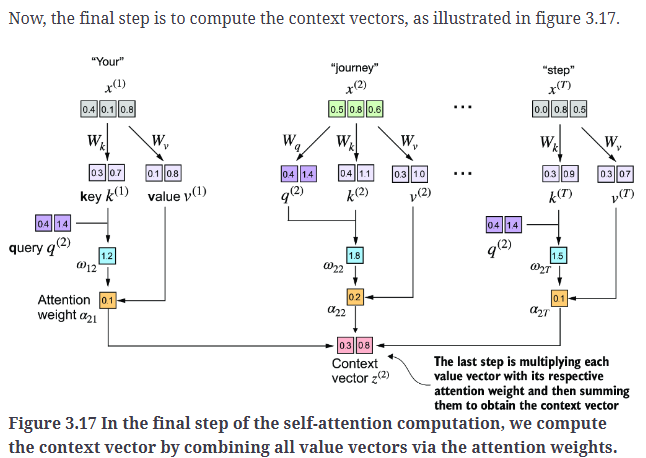

In [ ]:
# Create a trainable weights q,k,v
d_in = inputs.shape[1] # how many columns in input token
d_out = 2
dim_q = dim_k = d_in
dim_v = 28

torch.manual_seed(123)
Wq = torch.nn.Parameter(torch.rand(dim_q, d_out))
Wk = torch.nn.Parameter(torch.rand(dim_k, d_out))
Wv = torch.nn.Parameter(torch.rand(dim_k, d_out))
print(f"{Wq.shape=} ,{Wk.shape=}, {Wv.shape=}")

query = inputs @ Wq
keys = inputs @ Wk
values = inputs @ Wv

print(keys)
#Attn score using query and keys
attn_scores_qk = query @ keys.T

#print(f"{attn_scores_q.shape=} ,{attn_scores_k.shape=}, {attn_scores_q.shape=}")
print(attn_scores_qk)


if 1:
  #Normalise using Softmax to produce attention scores
  dim_k = keys.shape[1]
  attn_wts_qk = F.softmax(attn_scores_qk / dim_k**0.5, dim=1)
  print(attn_wts_qk.shape)
  print(attn_wts_qk)

  # Create context vector by dot product with the inputs.
  #context_vec = torch.sum((values.T @ attn_wts_qk),dim=0)
  context_vec = (attn_wts_qk @ values)
  print(context_vec)

Wq.shape=torch.Size([3, 2]) ,Wk.shape=torch.Size([3, 2]), Wv.shape=torch.Size([3, 2])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]], grad_fn=<MmBackward0>)
tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]],
       grad_fn=<MmBackward0>)
torch.Size([6, 6])
tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.108

# **# Self Attention Implementation using Class**

In [ ]:
#Self Attention class
import torch.nn.functional as F
import torch.nn as nn

class selfAttention(nn.Module):

  def __init__(self, d_in, d_out, context_len=6, useTorch=False, dropout=0.):
    super().__init__()
    self.useTorch = useTorch
    self.context_len = context_len

    # Dropout feature
    self.dropout = dropout
    if self.dropout > 0.:
      print(f"*** Drop out {dropout=}" )
      self.layerDropout = torch.nn.Dropout(self.dropout)

    if self.useTorch:
      self.Wq = torch.nn.Linear(d_in, d_out, bias=False)
      self.Wk = torch.nn.Linear(d_in, d_out, bias=False)
      self.Wv = torch.nn.Linear(d_in, d_out, bias=False)
    else:
      self.Wq = torch.rand(d_in, d_out)
      self.Wk = torch.rand(d_in, d_out)
      self.Wv = torch.rand(d_in, d_out)

    self.register_buffer("mask",torch.triu(torch.ones(self.context_len,self.context_len), diagonal=1))

  def forward(self, x):
    # Create attention scores
    if self.useTorch:
      self.query  = self.Wq(x)
      self.keys   = self.Wk(x)
      self.values = self.Wv(x)
    else:
      self.query  = x @ self.Wq
      self.keys   = x @ self.Wk
      self.values = x @ self.Wv

    # Create attention scores = q * k
    # (Causal) Mask the attention scores to hide inputs in the future
    self.attn_scores_qk = (self.query @ self.keys.T)
    self.attn_scores_qk.masked_fill_(self.mask.bool(), -torch.inf)

    # (attention weights) Normalise using Softmax = q*k/sqrt(dk)
    self.attn_wts_qk_norm = F.softmax(self.attn_scores_qk/ self.keys.shape[1]**0.5, dim=-1)

    # Apply dropout mask (if needed) on top of Causal mask
    if self.dropout:
      self.attn_wts_qk_norm = self.layerDropout(self.attn_wts_qk_norm)

    # Create context vector for output = norm_qk * values
    self.context_vec = self.attn_wts_qk_norm @ self.values

    return self.context_vec


In [ ]:
torch.manual_seed(789)
# Example inputs X
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
inputs.shape

d_in = inputs.shape[1]
d_out = 2

# Instantiate selfAttn mechanism
s_attn = selfAttention(d_in,d_out)
out = s_attn(inputs)
print(out)

tensor([[0.7379, 0.5923],
        [0.8989, 1.0589],
        [0.9254, 1.1290],
        [0.8255, 1.0164],
        [0.8076, 0.9539],
        [0.7631, 0.9471]])


In [ ]:
torch.manual_seed(789)
s_attn = selfAttention(d_in,d_out, useTorch=True, dropout=0.5)
out = s_attn(inputs)

print(s_attn.attn_wts_qk_norm)

print(out)

*** Drop out dropout=0.5
tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.4638, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.3968, 0.0000, 0.0000, 0.0000],
        [0.3869, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)
tensor([[-0.1744,  0.0572],
        [ 0.0000,  0.0000],
        [-0.0632,  0.0576],
        [-0.1464,  0.0522],
        [-0.0855,  0.0672],
        [-0.0716,  0.0365]], grad_fn=<MmBackward0>)


In [ ]:
s_attnd = selfAttention(d_in ,d_out, useTorch=True, dropout=0.0)
outd = s_attnd(inputs)
print(outd)

s_attnd.attn_wts_qk_norm

tensor([[-0.2836,  0.6535],
        [-0.2949,  0.6703],
        [-0.2948,  0.6732],
        [-0.2653,  0.5918],
        [-0.2199,  0.5513],
        [-0.2287,  0.5291]], grad_fn=<MmBackward0>)


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4675, 0.5325, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3054, 0.3478, 0.3468, 0.0000, 0.0000, 0.0000],
        [0.2411, 0.2562, 0.2561, 0.2467, 0.0000, 0.0000],
        [0.1925, 0.2104, 0.2097, 0.1976, 0.1898, 0.0000],
        [0.1602, 0.1715, 0.1715, 0.1646, 0.1671, 0.1650]],
       grad_fn=<SoftmaxBackward0>)

# Causal self Attention mechanism

In [ ]:
torch.manual_seed(123)
Wq = torch.rand(3,2)
Wk = torch.rand(3,2)
Wv = torch.rand(3,2)

query = inputs @ Wq
keys = inputs @ Wk
values = inputs @ Wv

attn_scores_qk = query @ keys.T
attn_wt_qk = F.softmax(attn_scores_qk/keys.shape[1]**0.5, dim=1)

attn_mask = torch.ones(6,6).tril()
attn_mask
ab = attn_wt_qk*attn_mask

ab/ab.sum(dim=1, keepdim=True)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3986, 0.6014, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2526, 0.3791, 0.3683, 0.0000, 0.0000, 0.0000],
        [0.2265, 0.2839, 0.2794, 0.2103, 0.0000, 0.0000],
        [0.1952, 0.2363, 0.2331, 0.1820, 0.1534, 0.0000],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])

In [ ]:
s_attn.attn_wts_qk_norm

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.4638, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.3968, 0.0000, 0.0000, 0.0000],
        [0.3869, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

In [ ]:
mask = torch.triu(torch.ones(ab.shape))
ab = ab.masked_fill(mask.bool(), -torch.inf)
ab

tensor([[  -inf,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1500,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1503, 0.2256,   -inf,   -inf,   -inf,   -inf],
        [0.1591, 0.1994, 0.1962,   -inf,   -inf,   -inf],
        [0.1610, 0.1949, 0.1923, 0.1501,   -inf,   -inf],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089,   -inf]])

In [ ]:
s_attn.attn_wts_qk_norm

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.4638, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.3968, 0.0000, 0.0000, 0.0000],
        [0.3869, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

In [ ]:
torch.exp(torch.tensor(-torch.inf))

tensor(0.)

In [ ]:
layer = torch.nn.Dropout(0.5)
layer(s_attn.attn_wts_qk_norm)

tensor([[4.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.2413, 0.0000, 0.0000, 0.0000],
        [1.1034, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.7931, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

# Debugging Self Attention class

In [ ]:
# Causal self Attention mechanism

In [ ]:

#torch.manual_seed(123)
#Self Attention class
import torch.nn.functional as F
import torch.nn as nn

class selfAttention(nn.Module):

  def __init__(self, d_in, d_out, context_len=6, useTorch=False, dropout=0.):
    super().__init__()
    self.useTorch = useTorch
    self.context_len = context_len

    # Dropout feature
    self.dropout = dropout
    if self.dropout > 0.:
      print(f"*** Drop out {dropout=}" )
      self.layerDropout = torch.nn.Dropout(self.dropout)

    if self.useTorch:
      self.Wq = torch.nn.Linear(d_in, d_out, bias=False)
      self.Wk = torch.nn.Linear(d_in, d_out, bias=False)
      self.Wv = torch.nn.Linear(d_in, d_out, bias=False)
      print(" Using PyTorch Linear()...")
    else:
      self.Wq = torch.rand(d_in, d_out)
      self.Wk = torch.rand(d_in, d_out)
      self.Wv = torch.rand(d_in, d_out)

    self.register_buffer("mask",torch.triu(torch.ones(self.context_len,self.context_len), diagonal=1))

  def forward(self, x):
    # Create attention scores
    if self.useTorch:
      print("Using pyTorch")
      self.query  = self.Wq(x)
      self.keys   = self.Wk(x)
      self.values = self.Wv(x)
    else:
      self.query  = x @ self.Wq
      self.keys   = x @ self.Wk
      self.values = x @ self.Wv


  #    # Create attention weights = q * k
  #    # (Causal) Mask the attention weights to hide inputs in the future
  #    self.attn_wts_qk = (self.query @ self.keys.T)
  #    self.attn_wts_qk.masked_fill_(self.mask.bool(), -torch.inf)
  #
  #    # Normalise using Softmax = q*k/sqrt(dk)
  #    self.attn_wts_qk_norm = F.softmax(self.attn_wts_qk/ self.keys.shape[1]**0.5, dim=-1)
  #
  #    # Apply dropout mask (if needed) on top of Causal mask
  #    if self.dropout:
  #      self.attn_wts_qk_norm = self.layerDropout(self.attn_wts_qk_norm)

  # Create attention scores = q * k
    self.attn_scores_qk = self.query @ self.keys.T

  # (Causal) Mask the attention weights to hide inputs in the future
    self.mask = self.attn_scores_qk.masked_fill_(self.mask.bool(), -torch.inf)

  # Normalise using Softmax = q*k/sqrt(dk)
    self.attn_wts_qk_norm = F.softmax(self.attn_scores_qk/ self.keys.shape[1]**0.5, dim=-1)

      # Create context vector for output = norm_qk * value
    self.context_vec = self.attn_wts_qk_norm @ self.values

    return self.context_vec


In [ ]:
torch.manual_seed(789)
s_attn1 = selfAttention(d_in, d_out, useTorch=True)
context_vec = s_attn1(inputs)
print(context_vec)
print(s_attn1.attn_scores_qk)
print(s_attn1.attn_wts_qk_norm)

 Using PyTorch Linear()...
Using pyTorch
tensor([[-0.0872,  0.0286],
        [-0.0991,  0.0501],
        [-0.0999,  0.0633],
        [-0.0983,  0.0489],
        [-0.0514,  0.1098],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward

In [ ]:
s_attn1.keys.shape

torch.Size([6, 2])

# **Causal Attention Mask Class - Complete Working one**

In [ ]:
# Causal self Attention mechanism
import torch.nn.functional as F
import torch.nn as nn

class causalAttention(nn.Module):

  def __init__(self, d_in, d_out, context_len=6, useTorch=False, dropout=0.):
    super().__init__()
    self.useTorch = useTorch
    self.context_len = context_len

    # Dropout feature
    self.dropout = dropout
    if self.dropout > 0.:
      print(f"*** Drop out {dropout=}" )
      self.layerDropout = torch.nn.Dropout(self.dropout)

    if self.useTorch:
      self.Wq = torch.nn.Linear(d_in, d_out, bias=False)
      self.Wk = torch.nn.Linear(d_in, d_out, bias=False)
      self.Wv = torch.nn.Linear(d_in, d_out, bias=False)
    else:
      self.Wq = torch.rand(d_in, d_out)
      self.Wk = torch.rand(d_in, d_out)
      self.Wv = torch.rand(d_in, d_out)

    self.register_buffer("mask",torch.triu(torch.ones(self.context_len,self.context_len), diagonal=1))

  def forward(self, x):
    batch,n_tokens, d_in = x.shape
    # Create attention scores
    if self.useTorch:
      self.query  = self.Wq(x)
      self.keys   = self.Wk(x)
      self.values = self.Wv(x)
    else:
      self.query  = x @ self.Wq
      self.keys   = x @ self.Wk
      self.values = x @ self.Wv

    # Create attention scores = q * k
    # (Causal) Mask the attention scores to hide inputs in the future
    self.attn_scores_qk = (self.query @ self.keys.transpose(-2,-1)) #Transpose last 2 dim
    self.attn_scores_qk.masked_fill_(self.mask.bool()[:n_tokens, :n_tokens], -torch.inf)

    # (attention weights) Normalise using Softmax = q*k/sqrt(dk)
    self.attn_wts_qk_norm = F.softmax(self.attn_scores_qk/ self.keys.shape[-1]**0.5, dim=-1)

    # Apply dropout mask (if needed) on top of Causal mask
    if self.dropout:
      self.attn_wts_qk_norm = self.layerDropout(self.attn_wts_qk_norm)

    # Create context vector for output = norm_qk * values
    self.context_vec = self.attn_wts_qk_norm @ self.values

    return self.context_vec

In [ ]:
torch.manual_seed(789)
batch = torch.stack((inputs,inputs),dim=0)
print(batch.shape)
context_len = batch.shape[1]
ca = causalAttention(d_in,d_out, context_len=context_len, useTorch=True)
c_out = ca(batch)
print(c_out)

torch.Size([2, 6, 3])
tensor([[[-0.0872,  0.0286],
         [-0.0991,  0.0501],
         [-0.0999,  0.0633],
         [-0.0983,  0.0489],
         [-0.0514,  0.1098],
         [-0.0754,  0.0693]],

        [[-0.0872,  0.0286],
         [-0.0991,  0.0501],
         [-0.0999,  0.0633],
         [-0.0983,  0.0489],
         [-0.0514,  0.1098],
         [-0.0754,  0.0693]]], grad_fn=<UnsafeViewBackward0>)


In [ ]:
x = torch.rand(2,32, 16)
b,n_token,d_in = x.shape
ca_1 = causalAttention(d_in,32, context_len=n_token,useTorch=True, dropout=0.5)
c_out = ca_1(x)
(ca_1.attn_wts_qk_norm[0])
print(c_out[-1])

*** Drop out dropout=0.5
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1721,  0.3135, -0.4567,  ..., -0.2658,  0.1022, -0.2455],
        ...,
        [-0.2498,  0.3142, -0.7253,  ..., -0.2852,  0.1565, -0.2813],
        [-0.3549,  0.3643, -0.8528,  ..., -0.2993,  0.1434, -0.3030],
        [-0.3224,  0.3732, -0.9546,  ..., -0.3515,  0.1866, -0.3072]],
       grad_fn=<SelectBackward0>)


# **# MultiHead Causal attention Layer class**

In [ ]:
# Multihead Causal attention class

class MultiheadCausalLayer_v1(nn.Module):
  def __init__(self, d_in,d_out,context_len,useTorch=True,dropout=0.,num_heads=1):
    super().__init__()
    self.num_heads = num_heads
    self.heads = nn.ModuleList(
       [causalAttention(d_in, d_out, context_len, useTorch=useTorch, dropout=dropout) for _ in range(num_heads)]
    )

  def forward(self, x):
    return torch.cat([head(x) for head in self.heads], dim=-1)




In [ ]:
import time

torch.manual_seed(123)
#x = torch.rand(2,32, 16)
x = torch.stack((inputs,inputs),dim=0)
b,n_token,d_in = x.shape
d_out = 40

start = time.perf_counter()
mhd = MultiheadCausalLayer_v1(d_in, d_out, context_len=n_token,useTorch=True, dropout=0., num_heads=20)
end = time.perf_counter()
%timeit mhd(x)

elapsed = (end - start)*1e3
print("Elapsed time =" f"{elapsed}ms")

6.07 ms ± 231 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Elapsed time =7.589621999997576ms


# **# MultiHead Attention layer class with parallelisation**

In [ ]:
# Multihead Attention class with parallel heads
class MultiHeadCasualFast(nn.Module):
  def __init__(self, d_in,d_out,context_len,dropout=0.,num_heads=1, bias=False):
    super().__init__()
    assert( d_out % num_heads == 0),f"d_out cannot be equally divided by num_heads"
    self.d_in         = d_in
    self.d_out        = d_out
    self.num_heads    = num_heads
    self.context_len  = context_len
    self.Dropout      = dropout
    self.bias         = bias
    self.head_dim     = d_out // num_heads

    self.Wq = torch.nn.Linear(d_in, d_out, bias=self.bias)
    self.Wk = torch.nn.Linear(d_in, d_out, bias=self.bias)
    self.Wv = torch.nn.Linear(d_in, d_out, bias=self.bias)
    self.dropoutLayer = nn.Dropout(dropout)
    self.register_buffer(
        "mask",
        torch.triu(torch.ones(self.context_len, self.context_len), diagonal=1)
    )

  def forward(self, x):
    b,n_tokens, d_in = x.shape

    # Create attention scores
    queries = self.Wq(x)
    keys    = self.Wq(x)
    values  = self.Wq(x)

    #Divide the QKV into heads
    # Split the d_out -> into equal num of heads (i.e if 4 -> 2,2)
    self.queries  = queries.view(b,n_tokens,self.num_heads, self.head_dim)
    self.keys     = keys.view(b,n_tokens,self.num_heads, self.head_dim)
    self.values   = values.view(b,n_tokens,self.num_heads, self.head_dim)

    # Split back to [b , num_heads, n_tokens, d_out]
    self.queries= self.queries.transpose(1,2)
    self.keys   = self.keys.transpose(1,2)
    self.values = self.values.transpose(1,2)

    # Generate attention scores Q.K ==> .shape = [b, n_tokens, num_heads, head_dims ]
    self.attn_scores_qk = self.queries @ self.keys.transpose(-2,-1)

    #Update masking on the attention scores (inplace operation).
    self.attn_scores_qk.masked_fill_(self.mask.bool()[:n_tokens, :n_tokens], -torch.inf)

    # (Attention weights) Normalise using Softmax = q*k/sqrt(dk)
    self.attn_wts_qk_norm = F.softmax(self.attn_scores_qk/ self.keys.shape[-1]**0.5, dim=-1)

    #update Dropouts if any
    self.attn_wts_qk_norm = self.dropoutLayer(self.attn_wts_qk_norm)

    # Create context vector for output = norm_qk * values
    self.context_vec = (self.attn_wts_qk_norm @ self.values).transpose(-2,-1)

    # Concatenate the Z or context vecs.
    self.context_vec = self.context_vec.contiguous().view(b, self.context_len, self.d_out)

    return self.context_vec
    #return self.keys





In [ ]:
import time

torch.manual_seed(123)
#x = torch.rand(2,32, 16)
x = torch.stack((inputs,inputs),dim=0)
b,n_token,d_in = x.shape
d_out = 40

start = time.perf_counter()
mhd_fast = MultiHeadCasualFast(d_in,d_out, context_len=n_token, dropout=0., num_heads=20)
end = time.perf_counter()
%timeit mhd_fast(x)
#print(mhd_fast(x))

elapsed = (end - start)*1e3
print("Elapsed time =" f"{elapsed}ms")


438 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Elapsed time =1.089307000000872ms


In [ ]:
%timeit mhd_fast(x)

594 µs ± 96.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit mhd(x)

5.79 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
